# Introduction

In this project, we will aim to predict the yield values of blueberries using certain features from the blueberry dataset, utilizing regression-based machine learning algorithms to achieve this.

## Feature Description

Below, you can find the names, meanings, and units of some features in the dataset.

| **Features**              | Definition                                                               | Unit           |
|---------------------------|--------------------------------------------------------------------------|----------------|
| **Clonesize**             | The average blueberry clone size in the field                           | m²             |
| **Honeybee**              | Honeybee density in the field                                           | bees/m²/min    |
| **Bumbles**               | Bumblebee density in the field                                          | bees/m²/min    |
| **Andrena**               | Andrena bee density in the field                                        | bees/m²/min    |
| **Osmia**                 | Osmia bee density in the field                                          | bees/m²/min    |
| **MaxOfUpperTRange**      | The highest record of the upper band daily air temperature during bloom season | ℃        |
| **MinOfUpperTRange**      | The lowest record of the upper band daily air temperature               | ℃              |
| **AverageOfUpperTRange**  | The average of the upper band daily air temperature                     | ℃              |
| **MaxOfLowerTRange**      | The highest record of the lower band daily air temperature              | ℃              |
| **MinOfLowerTRange**      | The lowest record of the lower band daily air temperature               | ℃              |
| **AverageOfLowerTRange**  | The average of the lower band daily air temperature                     | ℃              |
| **RainingDays Day**       | The total number of days during the bloom season with precipitation > 0 | day            |
| **AverageRainingDays**    | The average of raining days during the entire bloom season              | day            |


# Exploratory Data Analysis

## General Overwiev of Data

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/math482-2024-2025-1-hw-01/train.csv')

df.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,294.0,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.493690,0.433195,33.743494,5575.39447
1,1,684.0,25.0,0.50,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.632109,0.513261,43.670272,8489.69192
2,2,262.0,12.5,0.25,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.498952,0.442529,36.362937,5711.85174
3,3,19.0,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.429581,0.418220,33.299022,4926.27902
4,4,708.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.437424,0.430114,32.514844,4865.39997


In [3]:
df.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,431.614067,19.932709,0.385999,0.285451,0.487741,0.591901,82.337333,49.773460,68.794167,59.347000,28.718947,48.667933,18.815397,0.327473,0.499389,0.445246,36.050563,5999.507663
std,4330.271354,217.540936,8.945950,0.286250,0.059446,0.147636,0.145647,9.164759,5.556526,7.655908,6.623294,3.201340,5.401978,11.884656,0.167080,0.077072,0.038212,4.120694,1362.166817
min,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,37.000000,55.900000,41.200000,24.300000,40.800000,1.000000,0.060000,0.192732,0.249091,22.079199,1637.704020
25%,3749.750000,256.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.450103,0.417915,33.221987,5046.457340
50%,7499.500000,472.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.504761,0.445494,35.933802,6093.315270
75%,11249.250000,599.000000,25.000000,0.500000,0.380000,0.630000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,24.000000,0.390000,0.561190,0.471650,39.091856,7016.893850
max,14999.000000,5983.000000,750.633803,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.630000,0.817343,0.831514,46.369344,8969.401840


In features like `osmia` and `honeybee`, the minimum value appears as 0. This cannot be considered a missing value; it indicates that the bee density for that data point is 0. Since this is a realistic scenario, there is no need for us to take any action regarding it.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There is no missing value.

First, I am removing the ID column because it will not contribute to our analysis. The rows already have their own numbers.

In [5]:
df = df.drop(columns=['id'])
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,294.0,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.493690,0.433195,33.743494,5575.39447
1,684.0,25.0,0.50,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.632109,0.513261,43.670272,8489.69192
2,262.0,12.5,0.25,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.498952,0.442529,36.362937,5711.85174
3,19.0,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.429581,0.418220,33.299022,4926.27902
4,708.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.437424,0.430114,32.514844,4865.39997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,175.0,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.627442,0.519045,44.599471,8823.69011
14996,76.0,12.5,0.25,0.25,0.25,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.525948,0.460369,37.251242,6315.23321
14997,192.0,12.5,0.25,0.25,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.556302,0.471829,38.639843,6638.65649
14998,13.0,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.334594,0.377566,27.345454,3139.43255


Now, I will plot a histogram to see how the features are distributed and a boxplot to observe how many outliers there are.

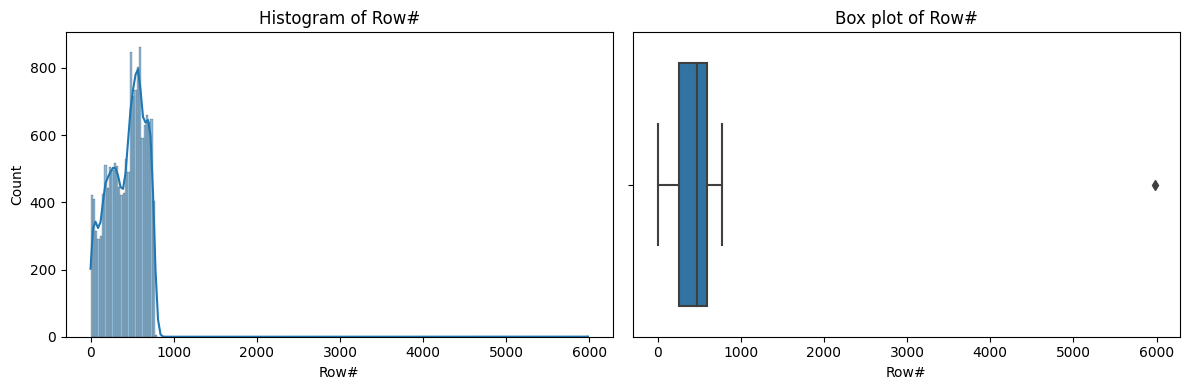

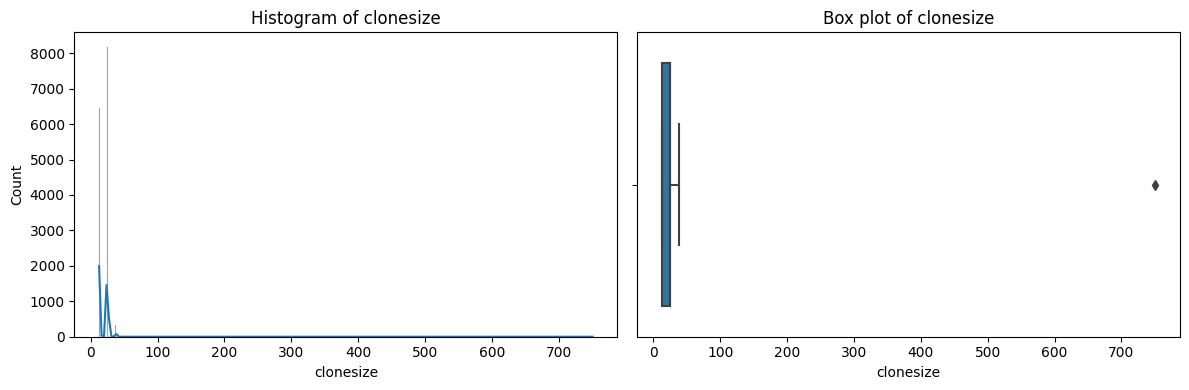

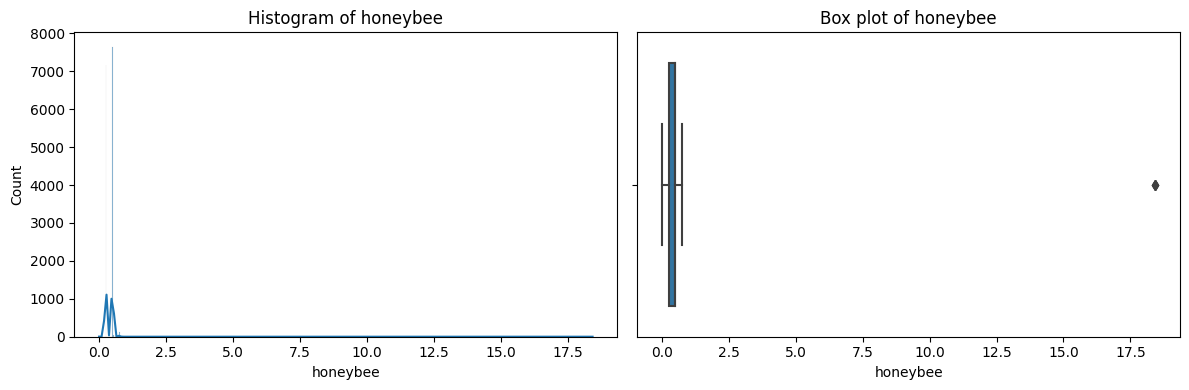

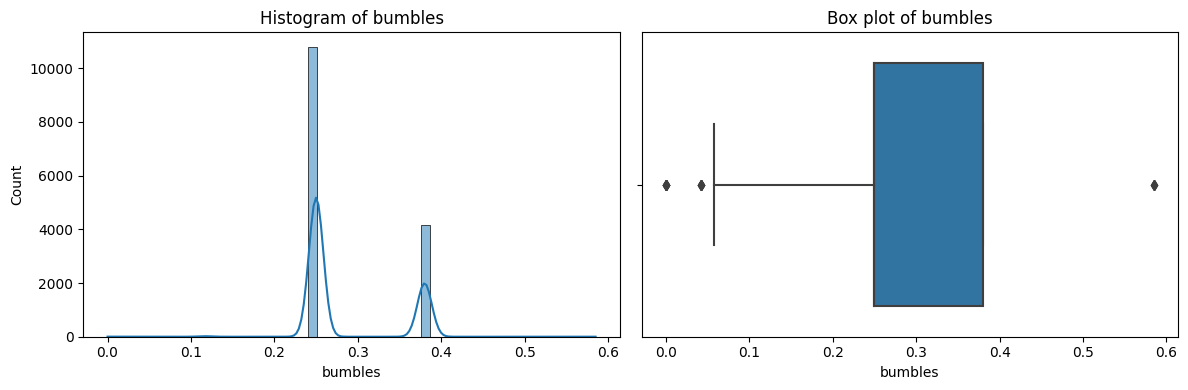

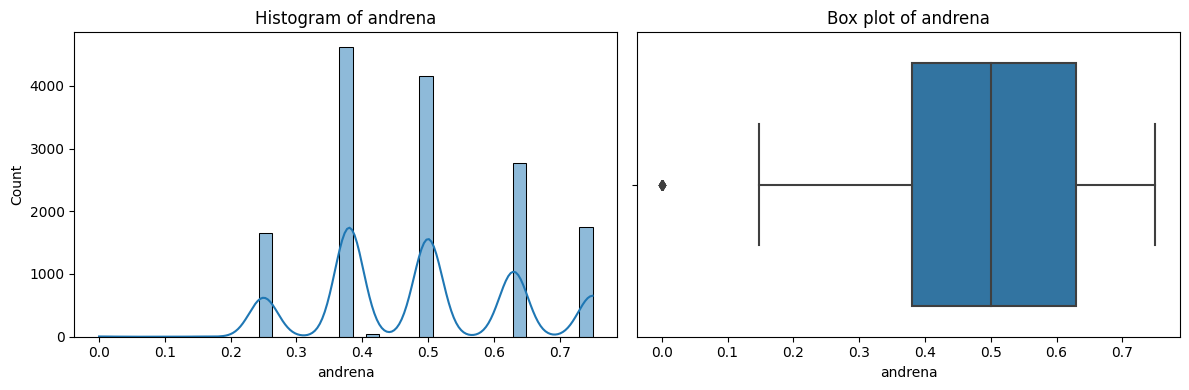

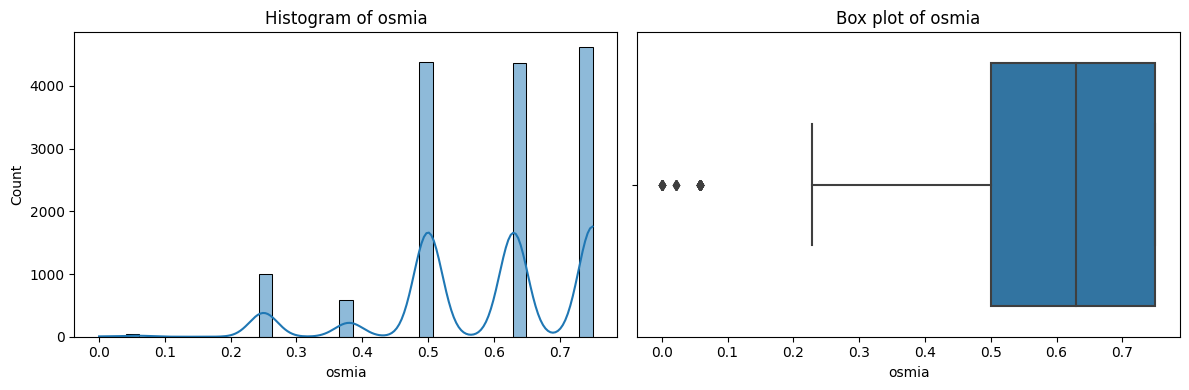

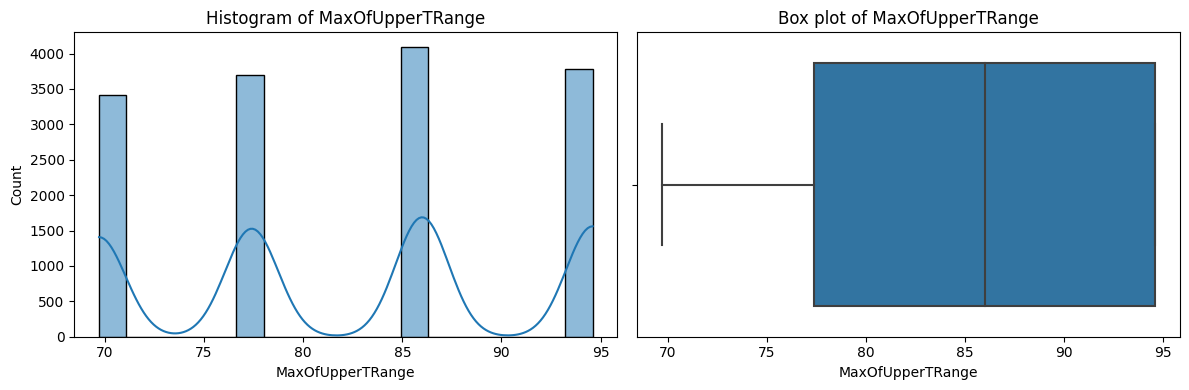

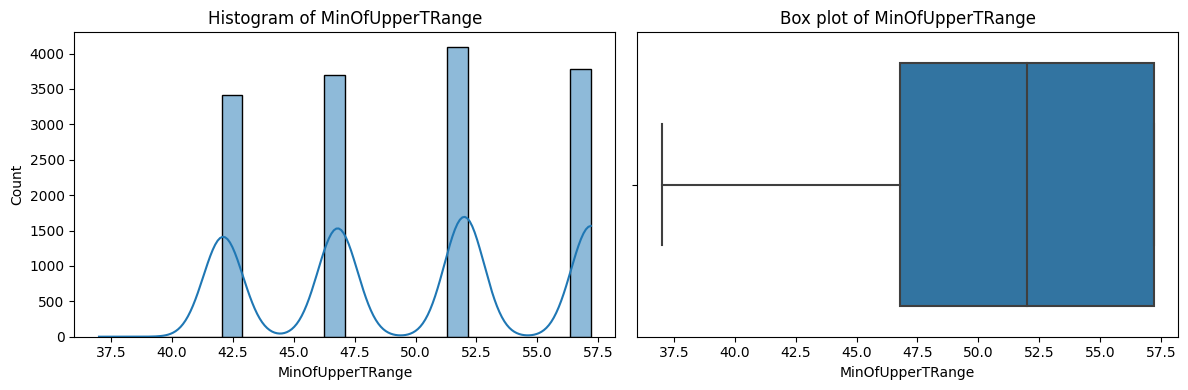

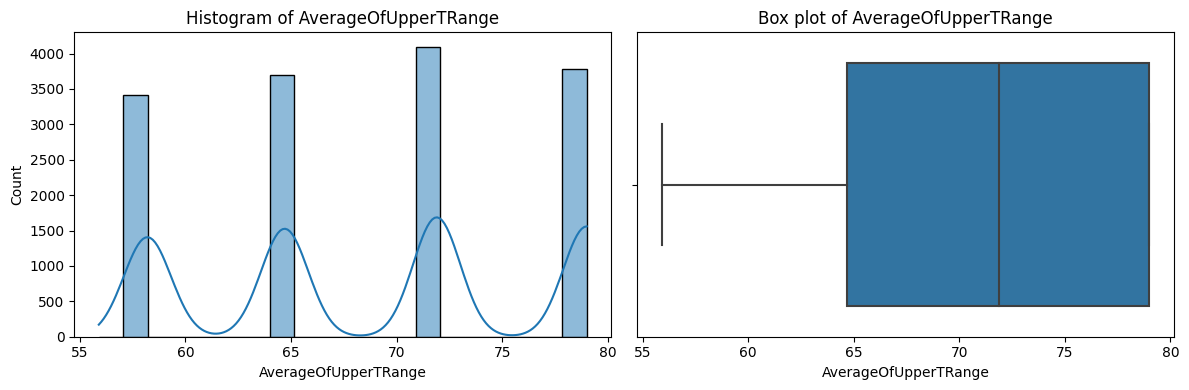

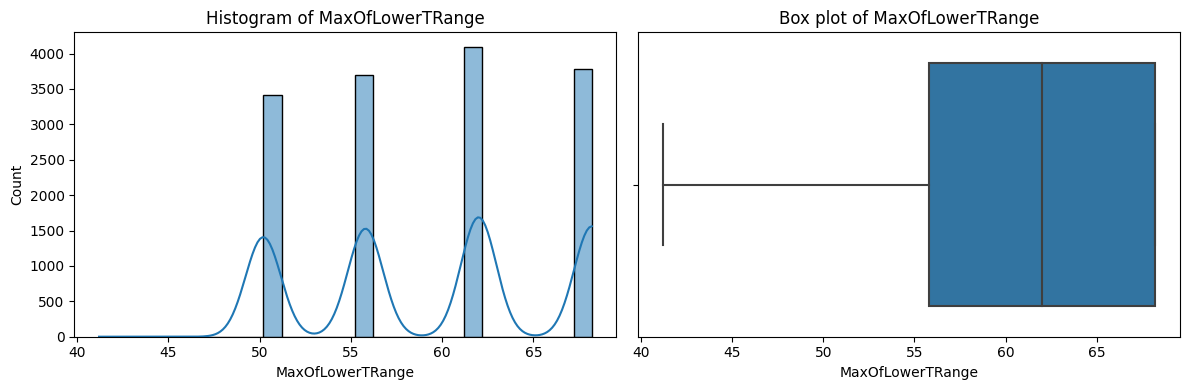

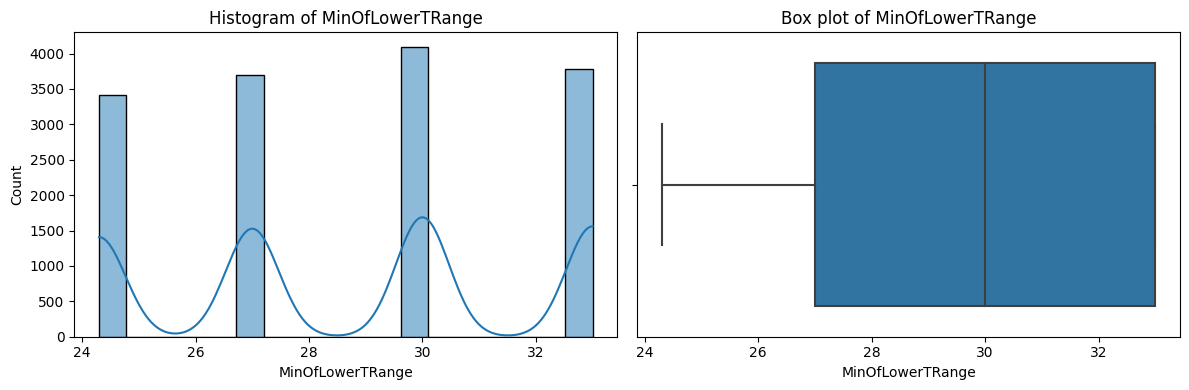

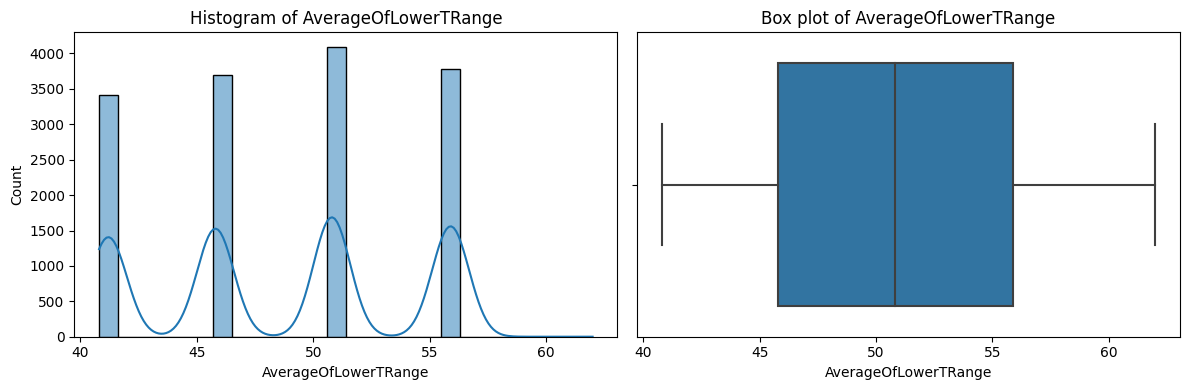

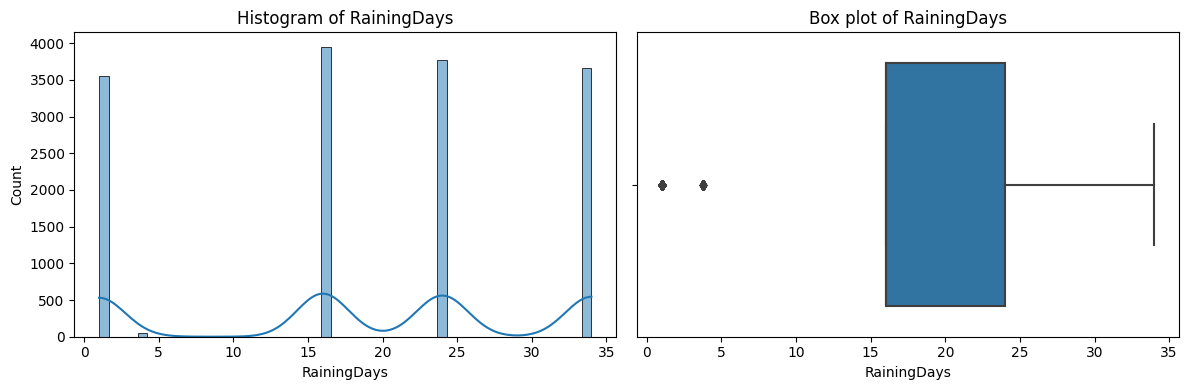

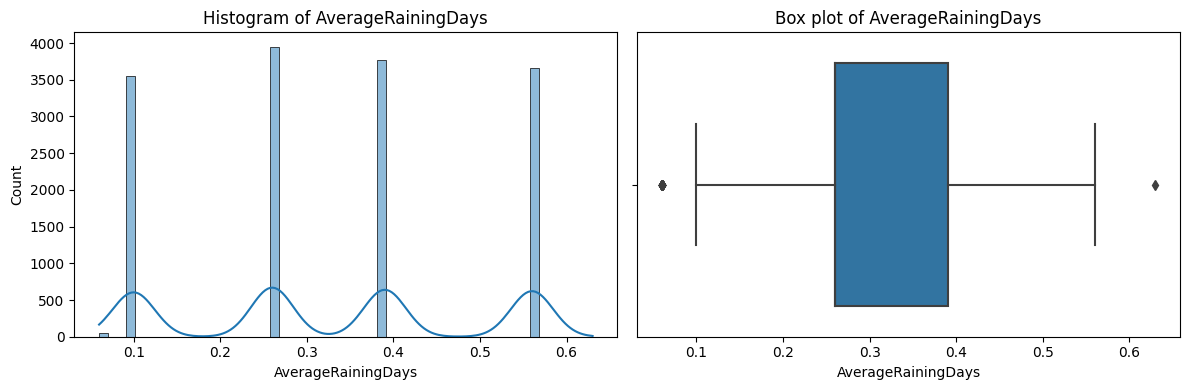

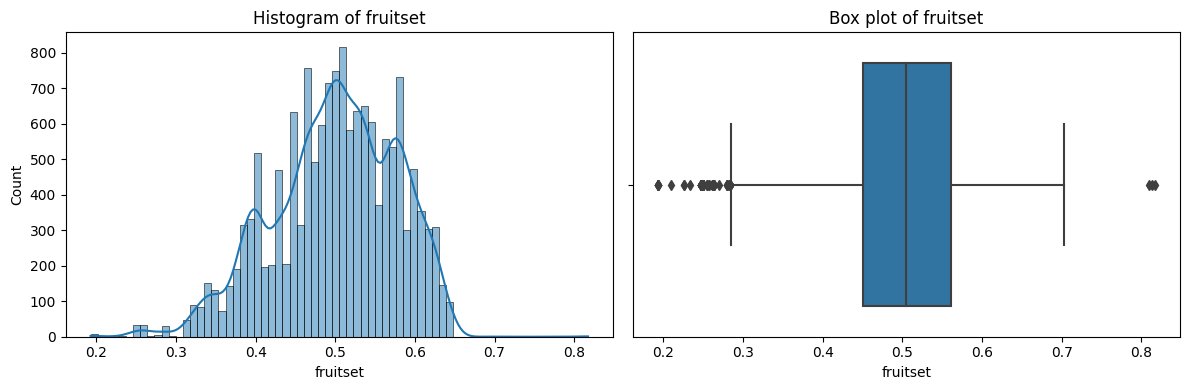

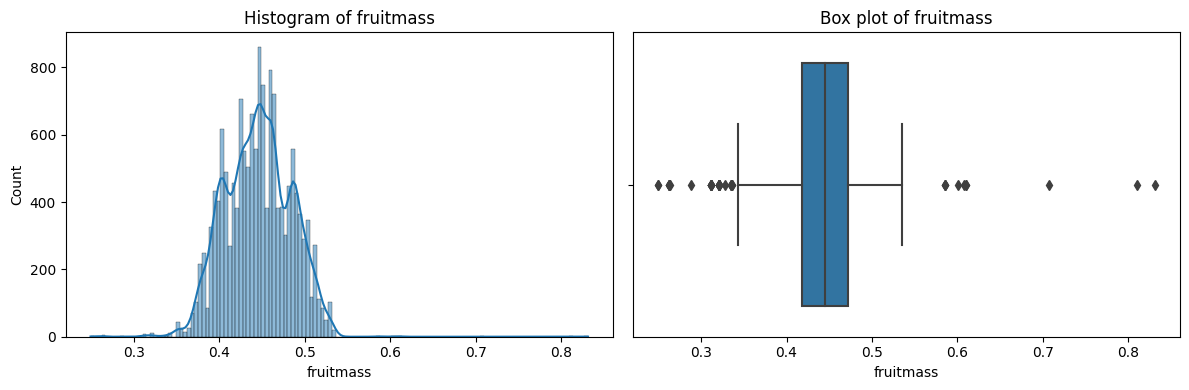

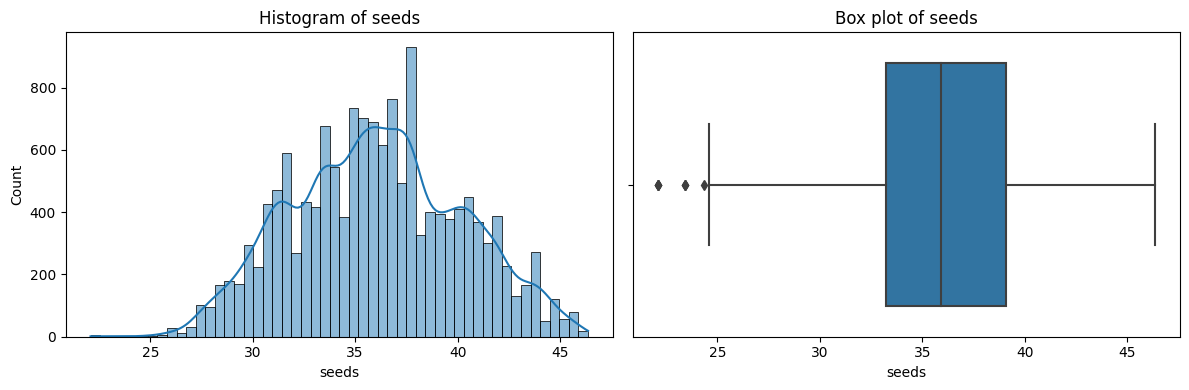

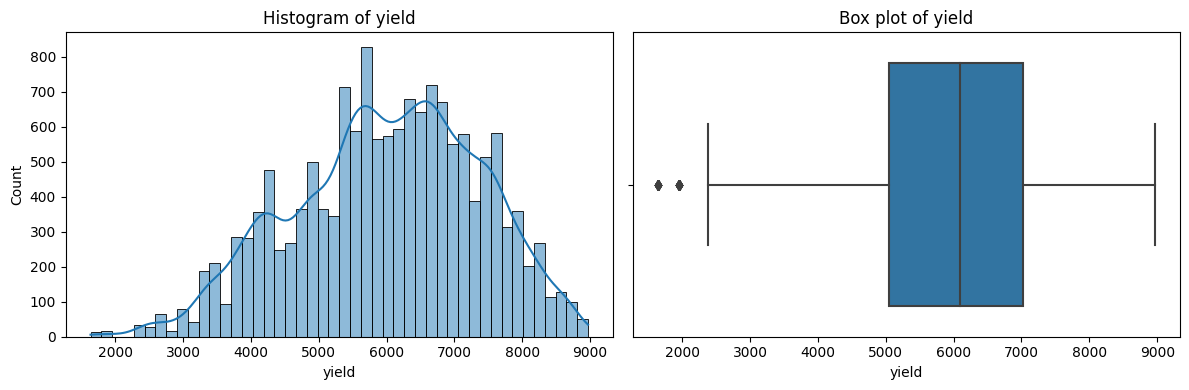

In [7]:
for column in df:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[column], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram of {column}')
    
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f'Box plot of {column}')
    
    plt.tight_layout()
    plt.show()

Now, we will examine the histogram and box plot of each of the feature and decide what transform we can apply. 

* **Row#:** The histogram shows a highly right-skewed distribution, with most of the values concentrated between 0 and 1000. This suggests that the majority of the data points are located in this lower range. The boxplot indicates the presence of outliers, as seen by the isolated point around 6000 on the right side. This suggests that there are values significantly higher than the typical range of the data. These outliers may need further investigation to determine if they are valid entries or if they could be errors.

* **clonesize:** The histogram and boxplot indicate a highly right-skewed distribution, with the majority of values clustered near zero and a long tail extending towards higher values. This suggests that most data points have small clone sizes, with a few significantly larger values acting as outliers, as seen in the boxplot around 700.

* **honeybee:** The distribution is heavily right-skewed, with most values close to zero and an extreme outlier around 17.5, indicating a small range with a few significant deviations.

* **bumbles:** The feature shows a concentrated distribution around 0.3 with some left-skewed outliers near 0 and a single higher outlier near 0.6.

* **andrea:** "Andrena" has a multi-modal distribution, mostly centered around 0.4 and 0.7, with an outlier near 0, suggesting discrete clusters. 

* **osmia:** The "osmia" feature also displays a multi-modal pattern with a few left-skewed outliers around 0, indicating values predominantly above 0.
* MaxOfUpperTRange: The histogram displays a multi-modal distribution with values concentrated around 70, 80, and 90. The boxplot shows a symmetrical range with no apparent outliers, suggesting a balanced distribution across these peaks.

* **MinOfUpperTRange:** This feature also exhibits a multi-modal distribution, with peaks around 40, 50, and 55. The boxplot indicates no outliers, suggesting most values fall within a predictable range.

* **AverageOfUpperTRange:** The histogram indicates a similar multi-modal pattern, with primary values around 60, 70, and 75. The boxplot confirms no outliers, indicating a well-distributed range within these peaks.

* **MinOfLowerTRange:** The data shows a periodic distribution with peaks around 25, 30, and 32. The boxplot displays no outliers, indicating a controlled range of values.

* **MaxOfLowerTRange:** The feature follows a periodic distribution with peaks around 50, 60, and 65. The boxplot shows no outliers, suggesting a stable range.

* **AverageOfLowerTRange:** This feature shows a periodic distribution with primary peaks around 45 and 55. The boxplot reveals no outliers, indicating a consistent distribution within this range.

* **RainingDays:** The histogram displays a multi-modal distribution with peaks around 0, 15, and 30. The boxplot indicates a few outliers at the low end, suggesting occasional anomalies in lower rainfall days.

* **AverageRainingDays:** The feature displays a similar periodic pattern, with values concentrated around 0.1, 0.3, and 0.5. The boxplot shows an outlier near 0, indicating a slight skew in lower average raining days.

* **fruitset:** The distribution is right-skewed with most values around 0.5, and a few outliers at both ends, as shown in the boxplot.

* **fruitmass:** The histogram suggests a slightly right-skewed distribution, with values mostly between 0.4 and 0.5. The boxplot highlights several outliers on both ends, indicating occasional extreme values.

* **seeds:** The histogram shows a nearly symmetrical, slightly right-skewed distribution centered around 35. The boxplot highlights a few lower-end outliers below 25, indicating a relatively consistent range of values with occasional deviations on the low side.

* **yield:** The distribution is slightly right-skewed, with most values centered around 6000. The boxplot displays two low outliers near 2000, suggesting that the majority of yields are within a typical range, but there are a few exceptionally low values that deviate from the norm.


From here, I will continue the analysis in two ways. The first approach will be to make no changes to the data and use it as is in the models I build. In the second approach, I will remove extreme outliers while leaving the less serious ones untouched. But before that, I will create a correlation map  to see the correlation between features and how linearly related they are with the yield value. The fact that I haven't removed outliers yet will not significantly affect these graphs, as the results would be similar even if I had removed them. But I will remove them before plotting the regression plot to see cleary regression line in the plot.
















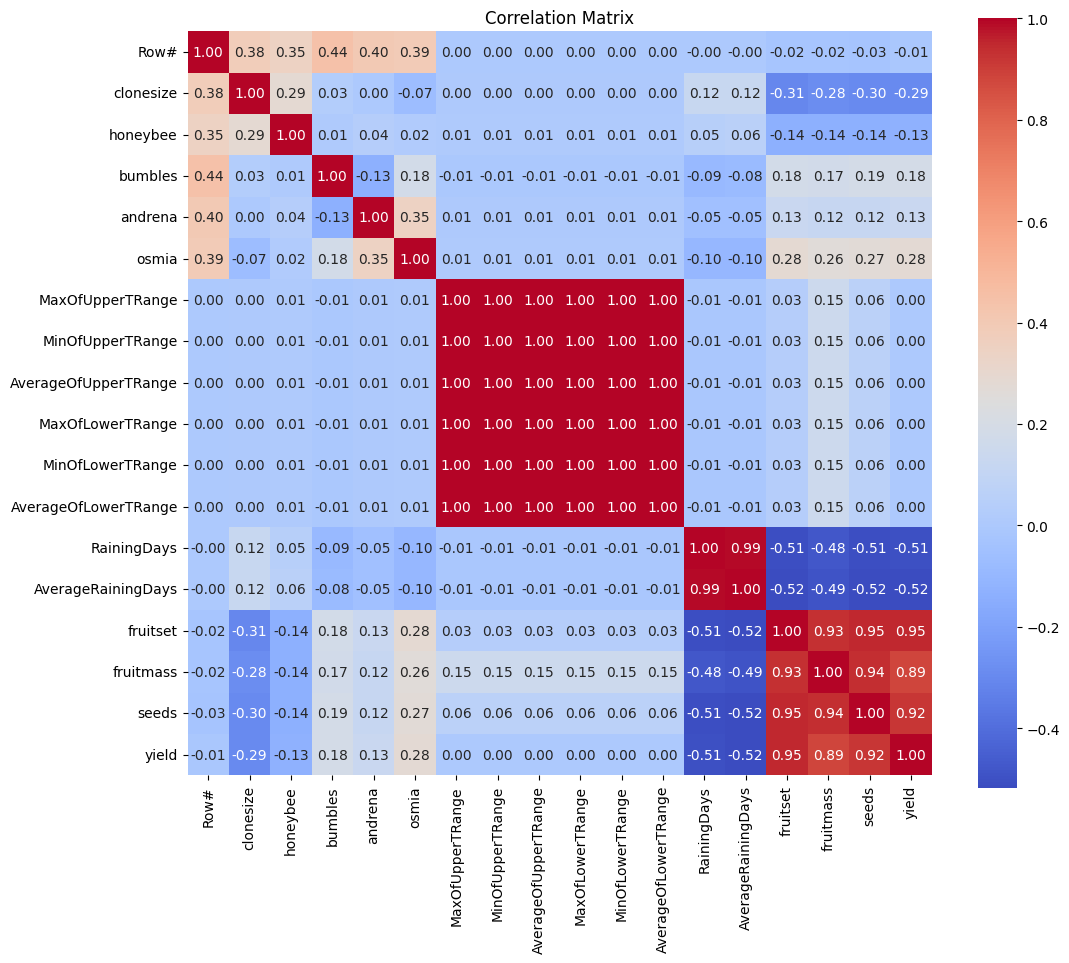

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix")
plt.show()

There appears to be a strong correlation between the physical properties of blueberries and yield, while there is an inverse correlation with the amount of raining days. However, there is almost no correlation among other features, with only a slight correlation for certain bee species.

Now, let's get rid of the outliers.








## Outlier Detection

In [6]:
df_cleaned = df.copy()

for i in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    if i not in ['RainingDays', 'AverageRainingDays']:
        Q1 = df_cleaned[i].quantile(0.25)
        Q3 = df_cleaned[i].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[(df_cleaned[i] >= lower_bound) & (df_cleaned[i] <= upper_bound)]


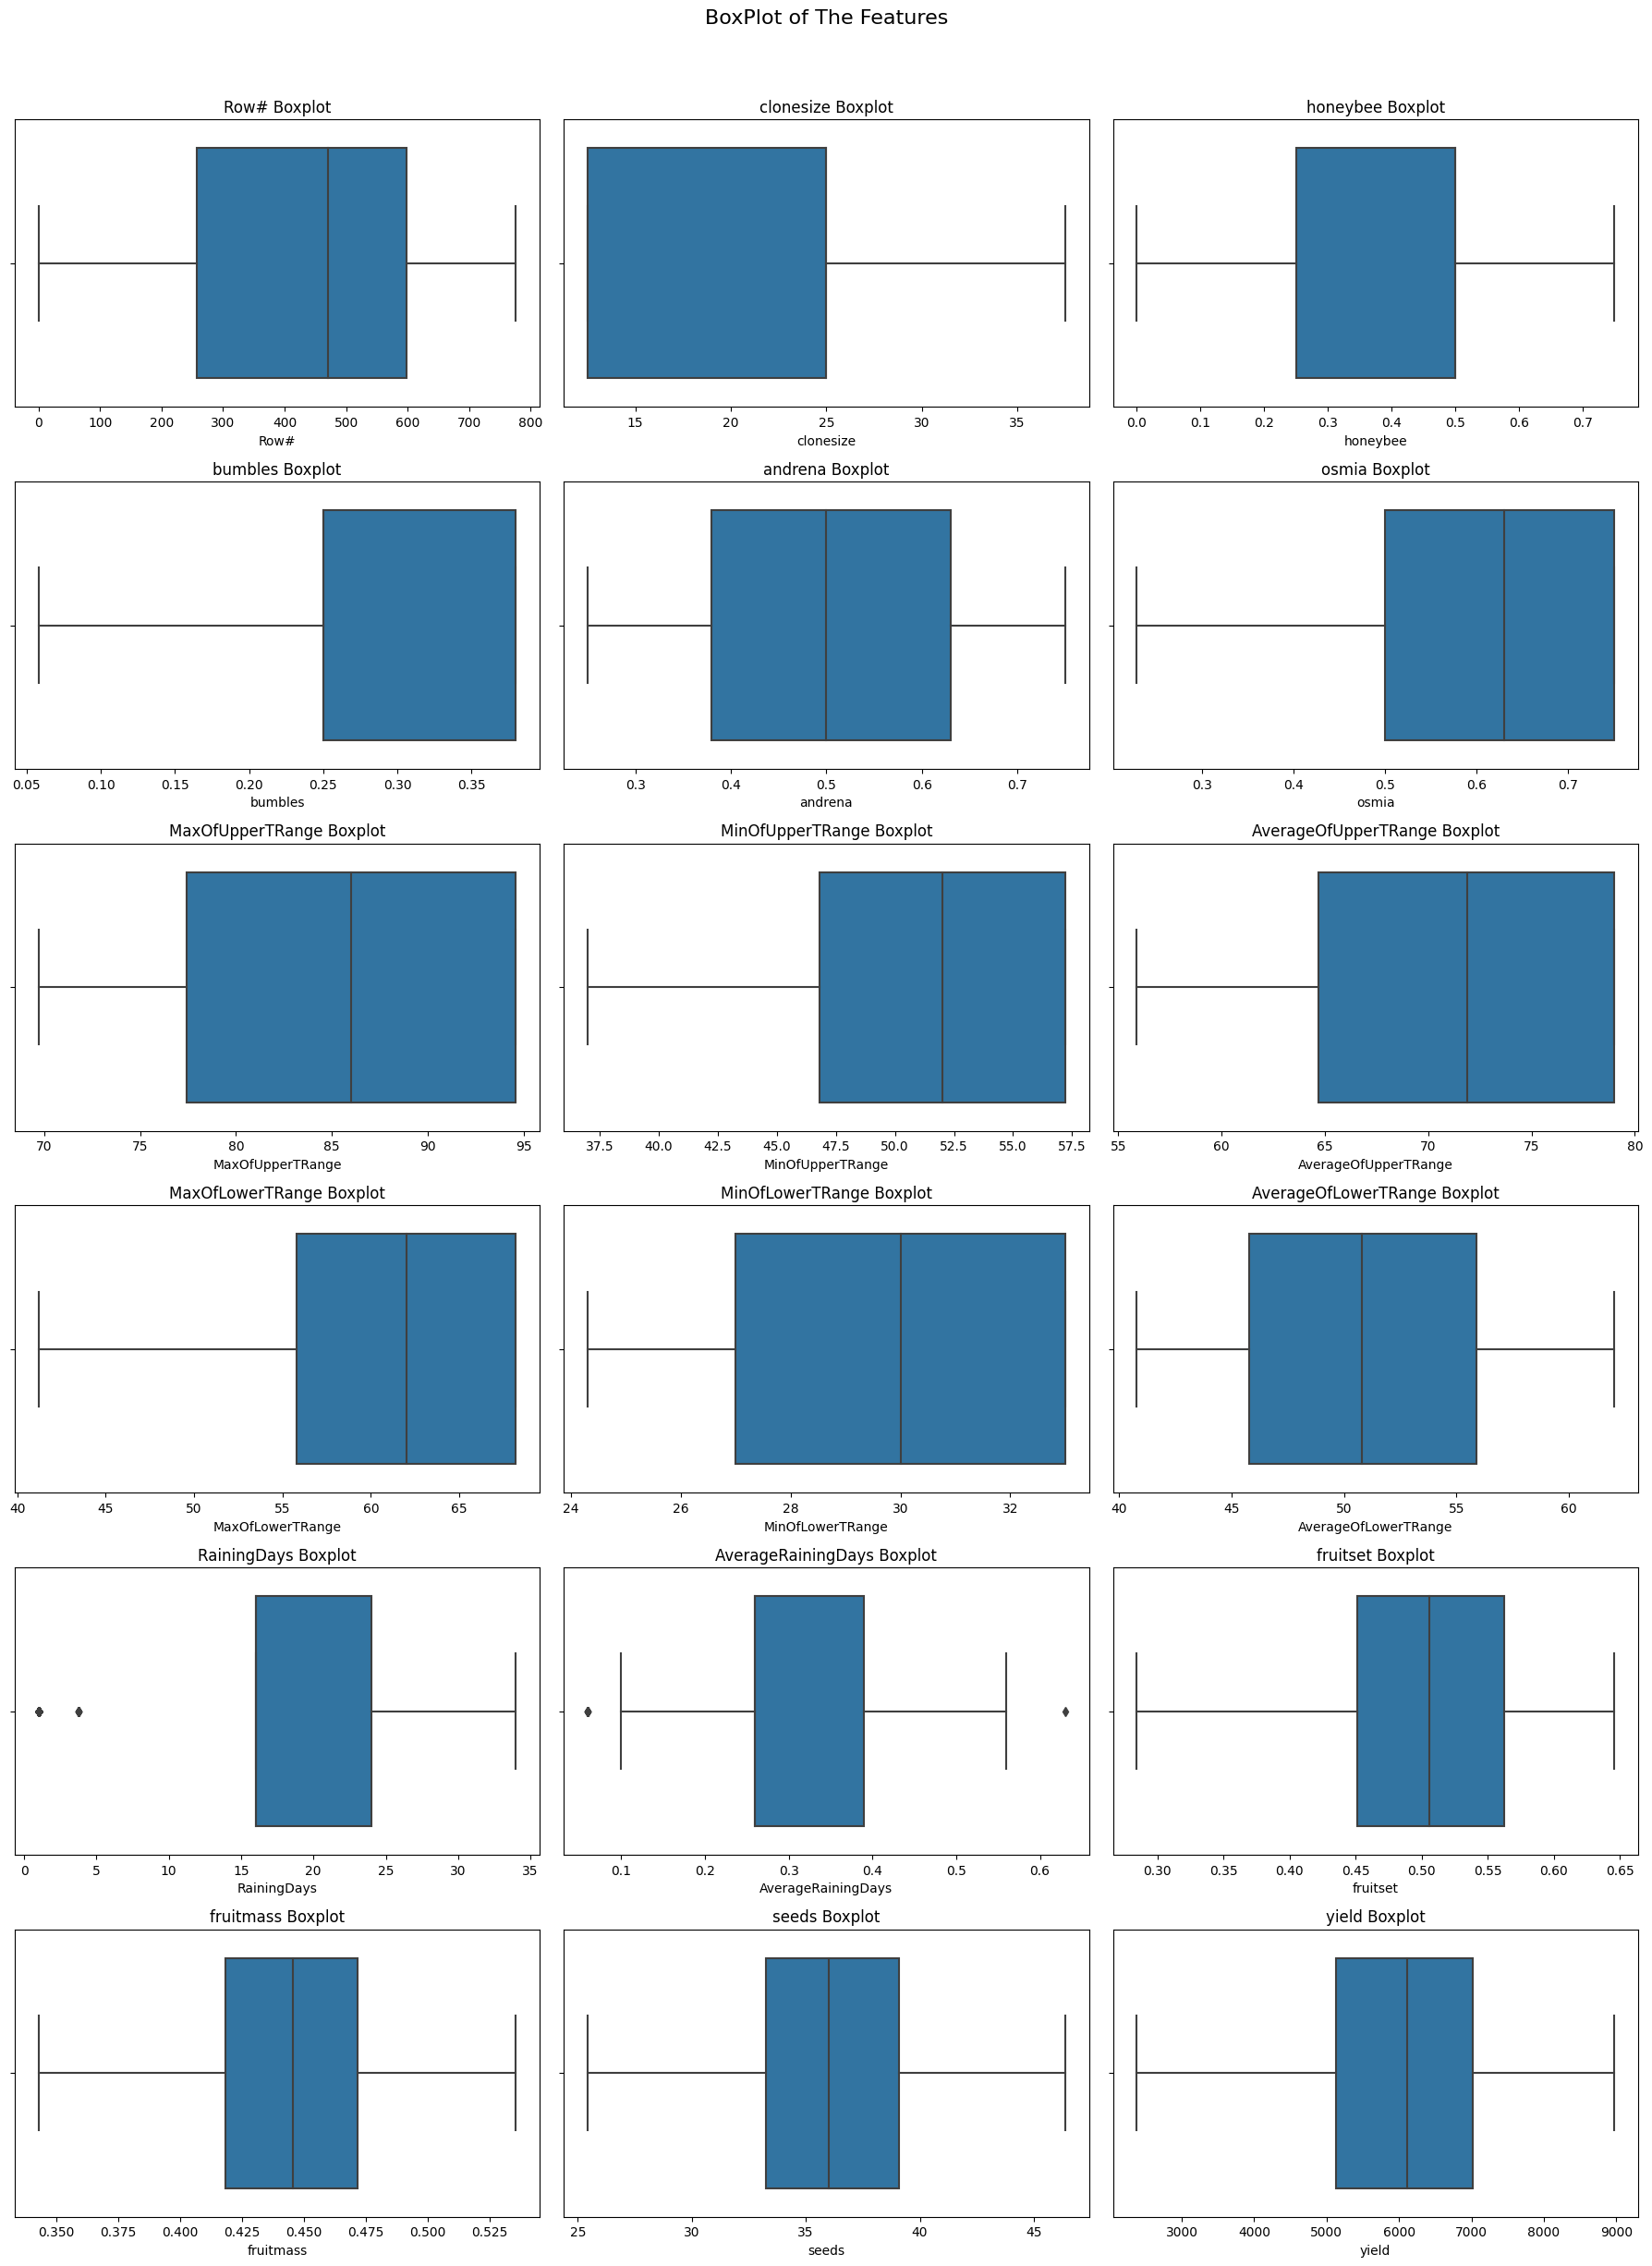

In [10]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
fig.suptitle("BoxPlot of The Features", fontsize=16, y=1.02)

for i, feature in enumerate(df_cleaned.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df_cleaned[feature], ax=axes[row, col])
    axes[row, col].set_title(f"{feature} Boxplot")

plt.tight_layout()
plt.show()

## Regression Plot

Now, let's print the regression plots by comparing the cleaned and original datasets.








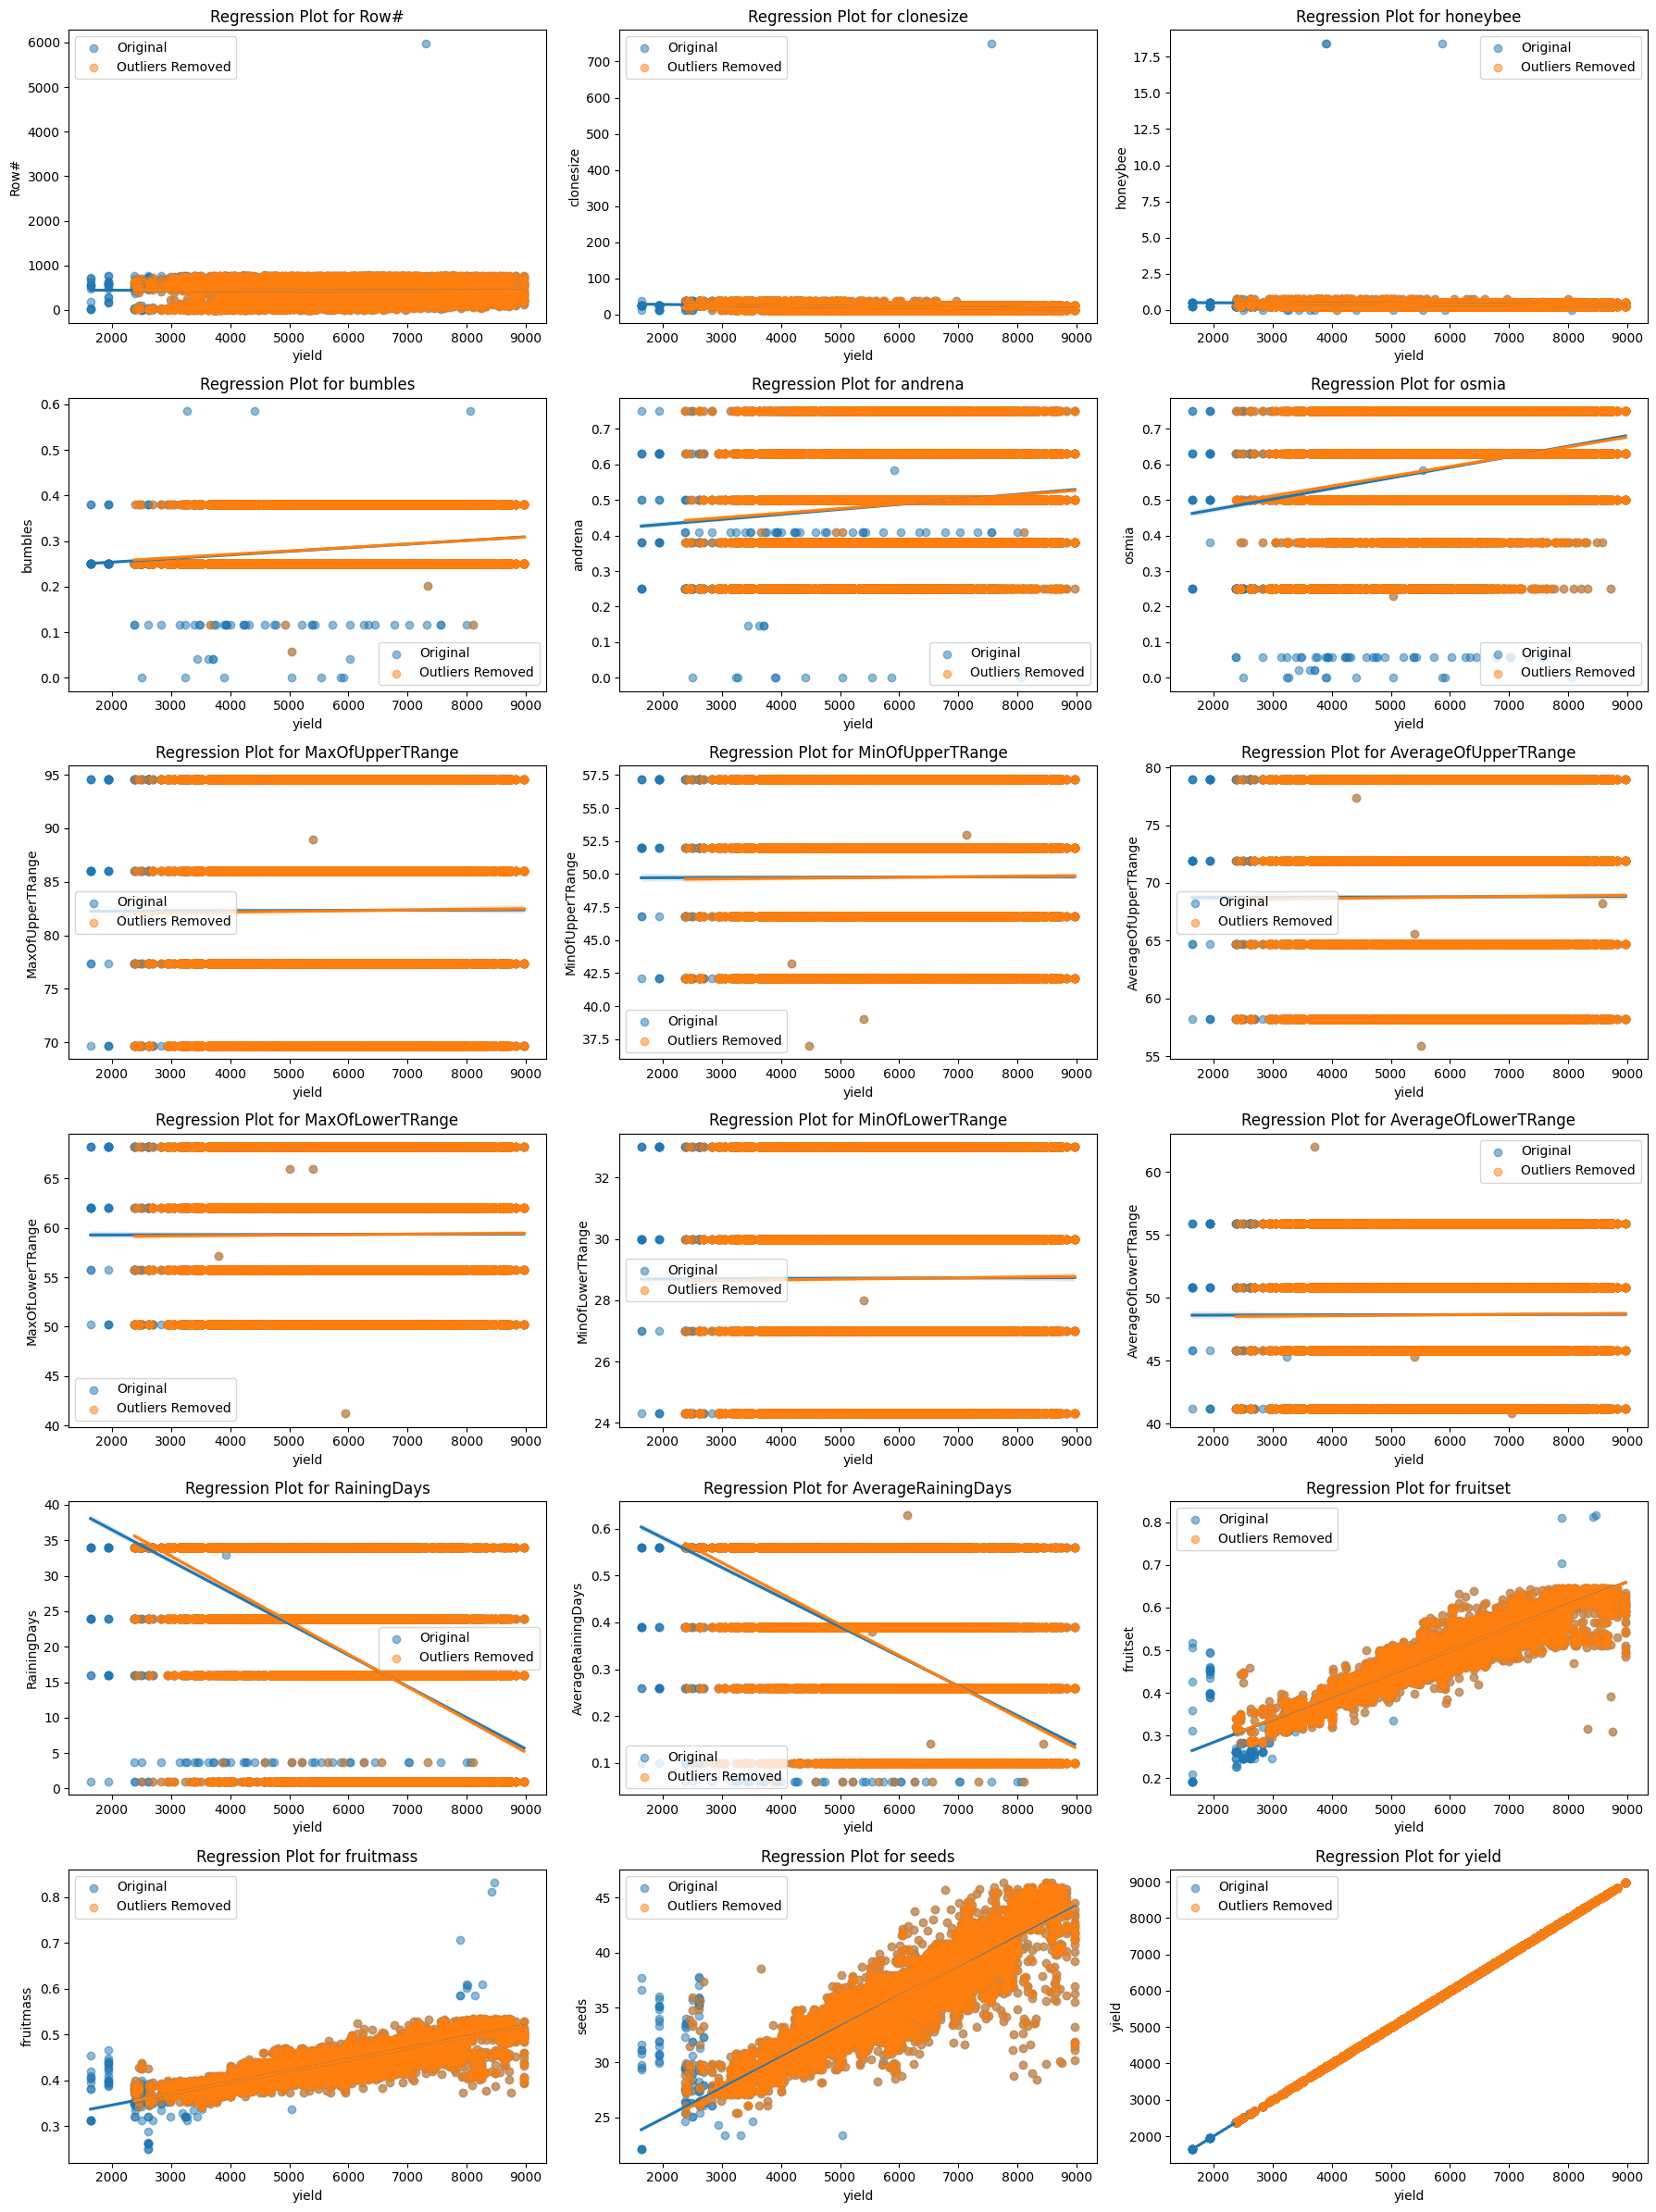

In [11]:
features = df.columns[:18]  

plt.figure(figsize=(18, 24)) 

for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)  
    sns.regplot(x='yield', y= feature, data=df, label='Original', scatter_kws={'alpha':0.5})
    sns.regplot(x= 'yield', y= feature, data=df_cleaned, label='Outliers Removed', scatter_kws={'alpha':0.5})
    
    plt.title(f'Regression Plot for {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

The regression plots turned out almost identical, which suggests that outliers don’t seem to have much of an impact.

We have now reached the point of selecting the models and determining which ones to use.








# Machine Learning Algorithms

I will build regression models using both the cleaned and original data. Additionally, while building the models, I will sometimes exclude certain features. For example, I won’t use the temperature range features in one of my regression models because they have no linear relationship with yield. However, I will include them in models like Random Forest Regression or XGBoost Regression, as these models can effectively utilize non-linear data.

Additionally, I won’t include all the temperature ranges; instead, I’ll either take the min-max values or the averages, and I’ll apply the same approach to raining days. This will help reduce the model’s complexity. Then, I’ll build a model using all features and compare their performance.















## Multiple Regression Part

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [21]:
def linear_regression_model(dataframe, features, target, test_size=0.2, random_state=42):

    X = dataframe[features]
    y = dataframe[target]
    
    #Split the data %80 for training and %20 for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    if dataframe is df:
        df_type = "Original DataFrame"
    elif dataframe is df_cleaned:
        df_type = "Cleaned DataFrame"
    else:
        df_type = "Unnamed DataFrame"
        
    print(f'{df_type}, Features: {features}')
    print(f'R^2 Score: {r2:.4f}, MAE: {mae:.4f}\n')
    return model, r2, mae

bees_feature = ['honeybee', 'bumbles', 'andrena', 'osmia']
bees_and_averagerainingdays = ['honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays']
physical_feature = [ 'fruitset', 'fruitmass', 'seeds' ]
features_without_temperatures =  ['clonesize','honeybee', 'bumbles', 'andrena', 'osmia','RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds' ]
all_features_average = ['clonesize','honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays','AverageOfUpperTRange','AverageOfLowerTRange', 'fruitset', 'fruitmass', 'seeds' ]
all_features = ['clonesize','honeybee', 'bumbles', 'andrena', 'osmia','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds' ]


feature_combinations = [bees_feature,bees_and_averagerainingdays, physical_feature, features_without_temperatures,all_features_average, all_features]

for features in feature_combinations:
    
    model, r2, mae = linear_regression_model(df, features, target='yield')
    
    model, r2, mae = linear_regression_model(df_cleaned, features, target='yield')

Original DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia']
R^2 Score: 0.1328, MAE: 1024.0358

Cleaned DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia']
R^2 Score: 0.1950, MAE: 955.1109

Original DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays']
R^2 Score: 0.3315, MAE: 869.7414

Cleaned DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays']
R^2 Score: 0.3904, MAE: 821.1918

Original DataFrame, Features: ['fruitset', 'fruitmass', 'seeds']
R^2 Score: 0.9035, MAE: 275.6934

Cleaned DataFrame, Features: ['fruitset', 'fruitmass', 'seeds']
R^2 Score: 0.9019, MAE: 274.5225

Original DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
R^2 Score: 0.9043, MAE: 274.5180

Cleaned DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'RainingDays', 'AverageRainingDays', 'fruitset', '

The model built with only bee-related features was not very successful, but we see improvements as we add other features. Additionally, removing outliers from the data had almost no impact on model performance at least for the regression model.

In [22]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, KFold

def linear_regression_model_cv(dataframe, features, target, cv=10):
   
    X = dataframe[features]
    y = dataframe[target]

    model = LinearRegression()

    r2_scorer = make_scorer(r2_score)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  

    r2_scores = cross_val_score(model, X, y, cv=cv, scoring=r2_scorer)
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring=mae_scorer)

    mean_r2 = r2_scores.mean()
    mean_mae = -mae_scores.mean()  

    if dataframe is df:
        df_type = "Original DataFrame"
    elif dataframe is df_cleaned:
        df_type = "Cleaned DataFrame"
    else:
        df_type = "Unnamed DataFrame"

    print(f'{df_type}, Features: {features}')
    print(f'Average R^2 Score (10-fold CV): {mean_r2:.4f}, Average MAE (10-fold CV): {mean_mae:.4f}\n')

    return mean_r2, mean_mae



for features in feature_combinations:
    mean_r2, mean_mae = linear_regression_model_cv(df, features, target='yield')

    mean_r2, mean_mae = linear_regression_model_cv(df_cleaned, features, target='yield')


Original DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia']
Average R^2 Score (10-fold CV): 0.1075, Average MAE (10-fold CV): 1033.5050

Cleaned DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia']
Average R^2 Score (10-fold CV): 0.2037, Average MAE (10-fold CV): 952.2485

Original DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays']
Average R^2 Score (10-fold CV): 0.3353, Average MAE (10-fold CV): 867.0023

Cleaned DataFrame, Features: ['honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays']
Average R^2 Score (10-fold CV): 0.3977, Average MAE (10-fold CV): 811.6711

Original DataFrame, Features: ['fruitset', 'fruitmass', 'seeds']
Average R^2 Score (10-fold CV): 0.9081, Average MAE (10-fold CV): 277.0364

Cleaned DataFrame, Features: ['fruitset', 'fruitmass', 'seeds']
Average R^2 Score (10-fold CV): 0.9112, Average MAE (10-fold CV): 272.4078

Original DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena'

The cleaned dataset produced higher average scores. Although the difference isn’t dramatic, it’s clear that removing outliers had a positive effect, albeit not a substantial one. Additionally, the model that included all features performed at 0.83, while the model with only average values (e.g., AverageRainingDays) performed noticeably better. This indicates that including every feature can overly complicate the model and reduce its effectiveness.

Great! Testing tree-based regression models should help you evaluate whether they can better capture complex relationships in your blueberry dataset, as suggested by the article. Let me know if you need help with setting up or tuning these models.

Link of the article: https://www.mdpi.com/2073-4395/11/9/1736

## Random Forest Regression Part

Now, I’ll use a tree-based model, Random Forest Regression, which is better suited for non-linear data. This model will help reveal any contributions from non-linear features like bees_feature or temperature range if they have any impact on the model.

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

def random_forest_model_cv(dataframe, features, target, cv=10, n_estimators=100, random_state=42):
    
    X = dataframe[features]
    y = dataframe[target]

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    r2_scorer = make_scorer(r2_score)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  

    r2_scores = cross_val_score(model, X, y, cv=cv, scoring=r2_scorer)
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring=mae_scorer)

    mean_r2 = r2_scores.mean()
    mean_mae = -mae_scores.mean()  

    if dataframe is df:
        df_type = "Original DataFrame"
    elif dataframe is df_cleaned:
        df_type = "Cleaned DataFrame"
    else:
        df_type = "Unnamed DataFrame"

    print(f'{df_type}, Features: {features}')
    print(f'Average R^2 Score (10-fold CV): {mean_r2:.4f}, Average MAE (10-fold CV): {mean_mae:.4f}\n')

    return mean_r2, mean_mae

rf_features = [all_features_average, all_features]

for features in rf_features:
    
    mean_r2, mean_mae = random_forest_model_cv(df, features, target='yield')

    mean_r2, mean_mae = random_forest_model_cv(df_cleaned, features, target='yield')

Original DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'fruitset', 'fruitmass', 'seeds']
Average R^2 Score (10-fold CV): 0.9188, Average MAE (10-fold CV): 259.1568

Cleaned DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'fruitset', 'fruitmass', 'seeds']
Average R^2 Score (10-fold CV): 0.9228, Average MAE (10-fold CV): 254.3970

Original DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
Average R^2 Score (10-fold CV): 0.9187, Average MAE (10-fold CV): 259.3168

Cleaned DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',

There doesn’t seem to be much of a difference.

## XGBoost Regression Part

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np


In [27]:

def cross_val_mae_xgboost(dataframe, features, target, cv=5):
       
    X = dataframe[features]
    y = dataframe[target]

    model = XGBRegressor(objective='reg:absoluteerror', random_state=42)
    
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

    mae_scores = cross_val_score(model, X, y, scoring=mae_scorer, cv=cv)
    
    mean_mae = -mae_scores.mean()
    
    if dataframe is df:
        df_type = "Original DataFrame"
    elif dataframe is df_cleaned:
        df_type = "Cleaned DataFrame"
    else:
        df_type = "Unnamed DataFrame"
    
    print(f'{df_type}, Features: {features}')
    print(f"Average MAE): {mean_mae:.4f}")

    return mean_mae

for features in rf_features:
    
    mean_mae1 = cross_val_mae_xgboost(df, features, target='yield')
    mean_mae1 = cross_val_mae_xgboost(df_cleaned, features, target='yield')

Original DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'fruitset', 'fruitmass', 'seeds']
Average MAE): 247.1315
Cleaned DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageRainingDays', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'fruitset', 'fruitmass', 'seeds']
Average MAE): 244.0173
Original DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
Average MAE): 247.0499
Cleaned DataFrame, Features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', '

We observe that the dataset with outliers removed provides slightly better performance. However, it’s worth noting that the difference is not substantial.

Now, I’ll try to improve the XGBoost model using Bayesian optimization, one of the hyperparameter tuning methods.

In [31]:
import optuna


In [32]:
X_optimized = df.drop(columns= ['Row#','yield'])  
y_optimized = df['yield']    

X_train_optimized, X_test_optimized, y_train_optimized, y_test_optimized = train_test_split(X_optimized, y_optimized, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_lambda': trial.suggest_loguniform('lambda', 1e-3, 10)
    }

    model = XGBRegressor(objective='reg:absoluteerror', **params)
    model.fit(X_train_optimized, y_train_optimized)

    y_pred_optimized = model.predict(X_test_optimized)
    mae = mean_absolute_error(y_test_optimized, y_pred_optimized)
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  

best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print(f"Best MAE Score: {best_score:.4f}")

[I 2024-11-10 17:02:55,078] A new study created in memory with name: no-name-bd58e338-a46a-486d-9956-43b88a0535f4
[I 2024-11-10 17:02:57,166] Trial 0 finished with value: 247.9843291080729 and parameters: {'n_estimators': 417, 'max_depth': 6, 'learning_rate': 0.10437700762106139, 'subsample': 0.6773206551797932, 'colsample_bytree': 0.5571733000107978, 'gamma': 0.7713070658245019, 'lambda': 0.7055623747422239}. Best is trial 0 with value: 247.9843291080729.
[I 2024-11-10 17:02:57,887] Trial 1 finished with value: 242.92692376033852 and parameters: {'n_estimators': 172, 'max_depth': 6, 'learning_rate': 0.08111551819606296, 'subsample': 0.8943875056944908, 'colsample_bytree': 0.6274646340049759, 'gamma': 0.9251741148872389, 'lambda': 1.6638443771457017}. Best is trial 1 with value: 242.92692376033852.
[I 2024-11-10 17:02:59,213] Trial 2 finished with value: 248.43446865315107 and parameters: {'n_estimators': 326, 'max_depth': 9, 'learning_rate': 0.16839705989526246, 'subsample': 0.7581225

Best Parameters: {'n_estimators': 366, 'max_depth': 8, 'learning_rate': 0.06577235954885918, 'subsample': 0.6953705841917893, 'colsample_bytree': 0.9999861421186211, 'gamma': 4.990618644089162, 'lambda': 0.6139971698418247}
Best MAE Score: 239.5696


In [35]:
best_model = XGBRegressor(objective='reg:absoluteerror', **best_params)
best_model.fit(X_train_optimized, y_train_optimized)

# Calculate MAE for training set
y_train_pred = best_model.predict(X_train_optimized)
train_mae = mean_absolute_error(y_train_optimized, y_train_pred)
print(f"Training Set MAE: {train_mae:.4f}")

# Calculate MAE for test set
y_test_pred = best_model.predict(X_test_optimized)
test_mae = mean_absolute_error(y_test_optimized, y_test_pred)
print(f"Test Set MAE: {test_mae:.4f}")

Training Set MAE: 231.8618
Test Set MAE: 239.5696


# Model Selection for Submission  

In [17]:
test_df = pd.read_csv("/kaggle/input/math482-2024-2025-1-hw-01/test.csv")

In [18]:
test_df

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,477.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.447781,0.419852,33.331194
1,15001,111.0,12.5,0.25,0.25,0.25,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.545095,0.466475,37.782288
2,15002,256.0,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.508992,0.453001,36.685413
3,15003,186.0,12.5,0.25,0.25,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.442627,0.424031,33.303900
4,15004,364.0,12.5,0.25,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.574989,0.482860,40.126092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,673.0,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.507542,0.443962,35.520534
9996,24996,716.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.509001,0.450786,37.013557
9997,24997,151.0,12.5,0.25,0.25,0.38,0.25,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.509782,0.408171,32.797666
9998,24998,743.0,25.0,0.50,0.38,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.520756,0.433195,35.557537


In [19]:
X_submission = test_df.drop(columns=['id', 'Row#'])
X_submission

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.447781,0.419852,33.331194
1,12.5,0.25,0.25,0.25,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.545095,0.466475,37.782288
2,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.508992,0.453001,36.685413
3,12.5,0.25,0.25,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.442627,0.424031,33.303900
4,12.5,0.25,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.574989,0.482860,40.126092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.507542,0.443962,35.520534
9996,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.509001,0.450786,37.013557
9997,12.5,0.25,0.25,0.38,0.25,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.509782,0.408171,32.797666
9998,25.0,0.50,0.38,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.520756,0.433195,35.557537


## Multiple Regression 

In [28]:
X_linear = df.drop(columns=['Row#', 'yield'])  
y_linear = df['yield']  

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train_linear, y_train_linear)

y_pred = model_linear.predict(X_test_linear)


In [44]:
predictions_linear = model_linear.predict(X_submission)

submission_linear = pd.DataFrame({
    "id": test_df["id"],
    "yield": predictions_linear
})

submission_linear.to_csv("submission_linear.csv", index=False)

## Random Forest Regression

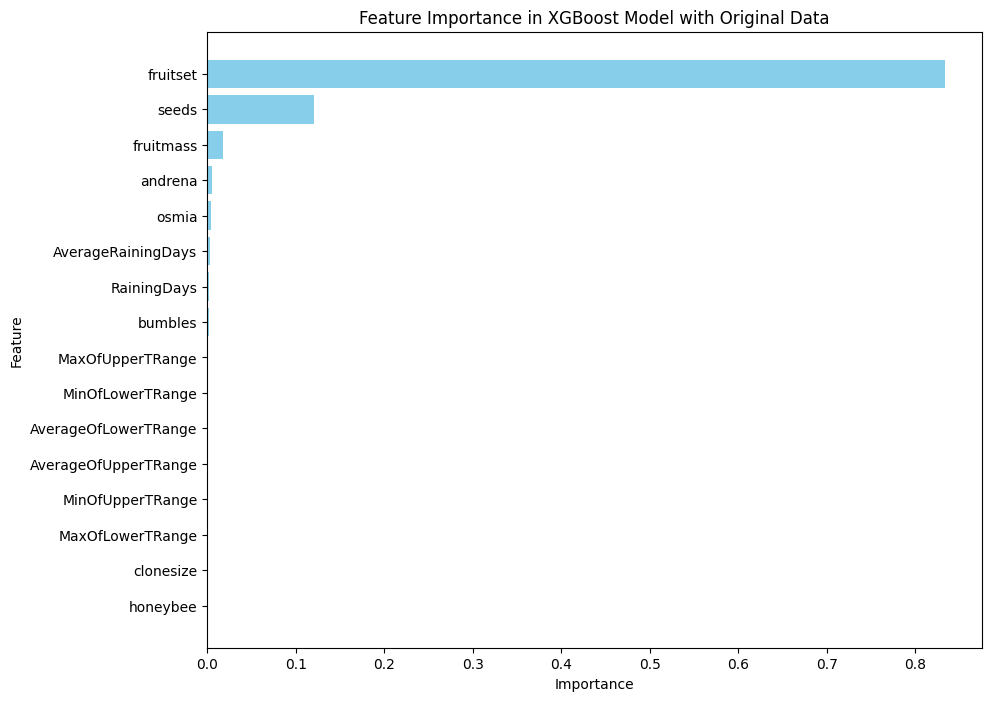

In [14]:
from sklearn.ensemble import RandomForestRegressor

X_rf = df.drop(columns = ['yield', 'Row#'])  
y_rf = df['yield']


X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_rf, y_rf, test_size = 0.2)


model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model_rf.fit(X_random_train, y_random_train)


y_random_pred = model_rf.predict(X_random_test)

y_pred = model_xgb_original.predict(X_test_xgb)

feature_importances_rf = model_rf.feature_importances_
feature_names_rf = X_rf.columns

importance_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances_rf})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model with Original Data')
plt.gca().invert_yaxis()  
plt.show()



In [45]:
predictions_rf_regressor = model_rf.predict(X_submission)

submission_rf_regressor = pd.DataFrame({
    "id": test_df["id"],
    "yield": predictions_rf_regressor
})

submission_rf_regressor.to_csv("submission_rf_regressor.csv", index=False)

## XGBoost Regression

Now, for the XGBoost model which is optimized.

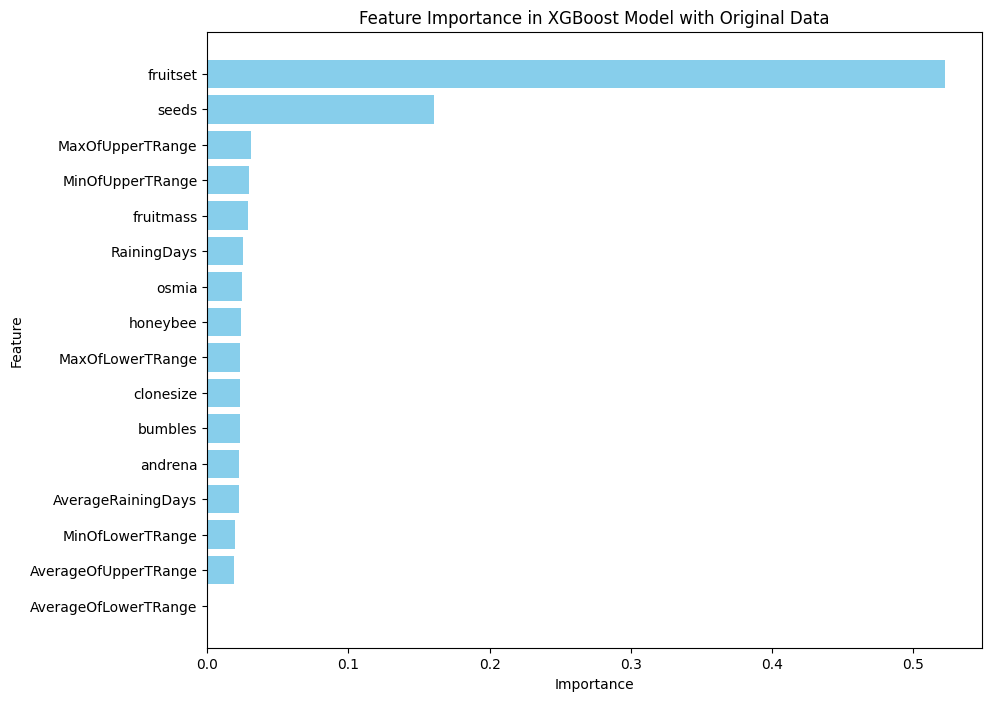

In [36]:
feature_importances_xgb_optimized = best_model.feature_importances_
feature_names_xgb_optimized = X_optimized.columns

importance_df = pd.DataFrame({'Feature': feature_names_xgb_optimized, 'Importance': feature_importances_xgb_optimized})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model with Original Data')
plt.gca().invert_yaxis()  
plt.show()

It is clear that, with this model, the contributions of the other features to the model have visibly increased.

In [46]:
predictions_xgb_optimized = best_model.predict(X_submission)

submission_xgb_optimized = pd.DataFrame({
    "id": test_df["id"],
    "yield": predictions_xgb_optimized
})

submission_xgb_optimized.to_csv("submission_xgb_optimized.csv", index=False)